In [2]:
import numpy as np

In [3]:
myarrays = np.load("./mc_scanner/MC_dumps/dwarf/N3_da(0.2)_dt(3000.0 ms)/da_dt_6492f2991294.npz")

Text(0.5, 1.0, 'MC Population')

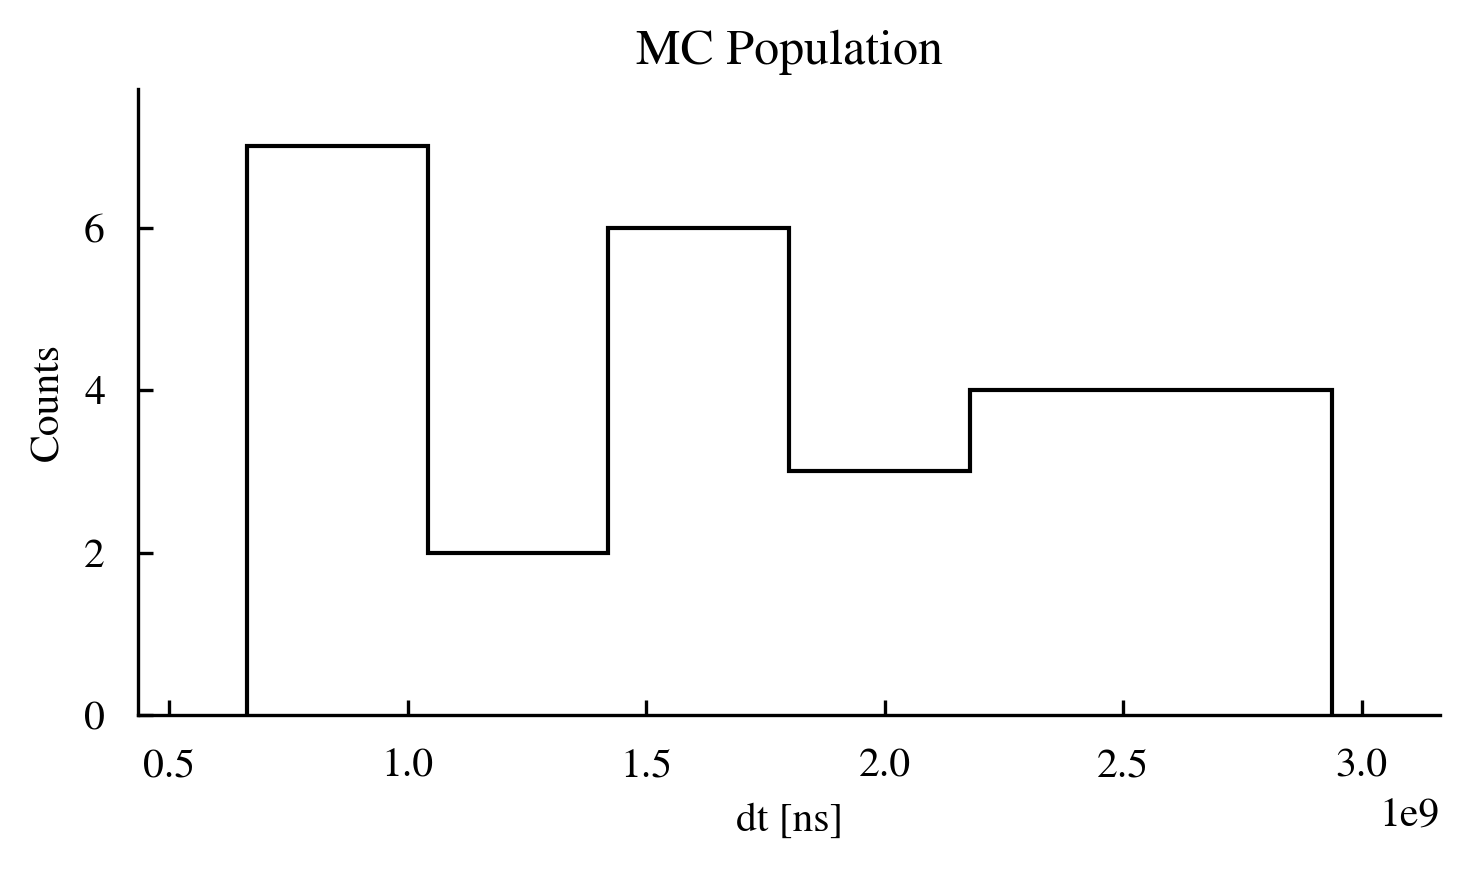

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
h = plt.hist(myarrays["dt"],histtype="step")
plt.xlabel("dt [ns]")
plt.ylabel("Counts")
plt.title("MC Population")



In [1]:
from regions import CircleSkyRegion, RectangleSkyRegion
from astropy.coordinates import SkyCoord
import astropy.units as u
from gammapy.maps import RegionGeom

In [2]:
# center= SkyCoord(283.775,-31.1833,unit="deg",frame="fk5")
# circle = CircleSkyRegion(center,0.1 * u.deg)
# rect = RectangleSkyRegion(center,5 * u.deg,5 * u.deg)
# rg_c = RegionGeom(circle)
# rg_r = RegionGeom(rect)

# rg_r.solid_angle()/rg_c.solid_angle()

<Quantity 795.77471546>

In [54]:
import scanner_interpretation as sca
ds = sca.getDataStores()

ds[0].info()

Data store:
HDU index table:
BASE_DIR: /lustre/fs22/group/hess/fitsdata/fits_prod05/hess1/std_ImPACT_fullEnclosure
Rows: 104967
OBS_ID: 18361 -- 85392
HDU_TYPE: ['aeff', 'bkg', 'edisp', 'events', 'gti', 'psf']
HDU_CLASS: ['aeff_2d', 'bkg_3d', 'edisp_2d', 'events', 'gti', 'psf_table']


Observation table:
Observatory name: 'N/A'
Number of observations: 17519



In [37]:
import dill
from gammapy.datasets import MapDataset
from gammapy.maps import WcsNDMap
from astropy.coordinates import SkyCoord
import astropy.units as u
with open("mc_scanner/real_dataset_dumps/hbl/stacked_datasets.pkl","rb") as f:
    myob: MapDataset = dill.load(f)

In [32]:
exp: WcsNDMap  = myob.exposure
obj: WcsNDMap = exp.sum_over_axes(["energy_true"],keepdims=False)

In [46]:
PNT: SkyCoord = SkyCoord([0.363599987030068,0.4],[-30.6275,-31],frame="fk5",unit="deg")
list(zip(*obj.geom.coord_to_idx(PNT)))

[(125, 124), (123, 106)]

In [47]:
d = 10
x,y = np.meshgrid(np.arange(250),np.arange(250))
distance = np.sqrt((x - 125)**2 + (y - 125)**2)
indices = np.where(distance <= d)


(array([115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117,
       117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 118, 118,
       118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 119,
       119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119,
       119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121,
       121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       122, 122, 122, 122, 122, 122, 123, 123, 123, 123, 123, 123, 123,
       123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 124,
       124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124,
       124, 124, 124, 124, 124, 125, 125, 125, 125, 125, 125, 125, 125,
       125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 1

In [56]:
np.sum(obj.get_by_idx(indices))

2742608700000.0

In [61]:
ds = sca.getDataStores()[0]
len(ds.obs_ids)

17519

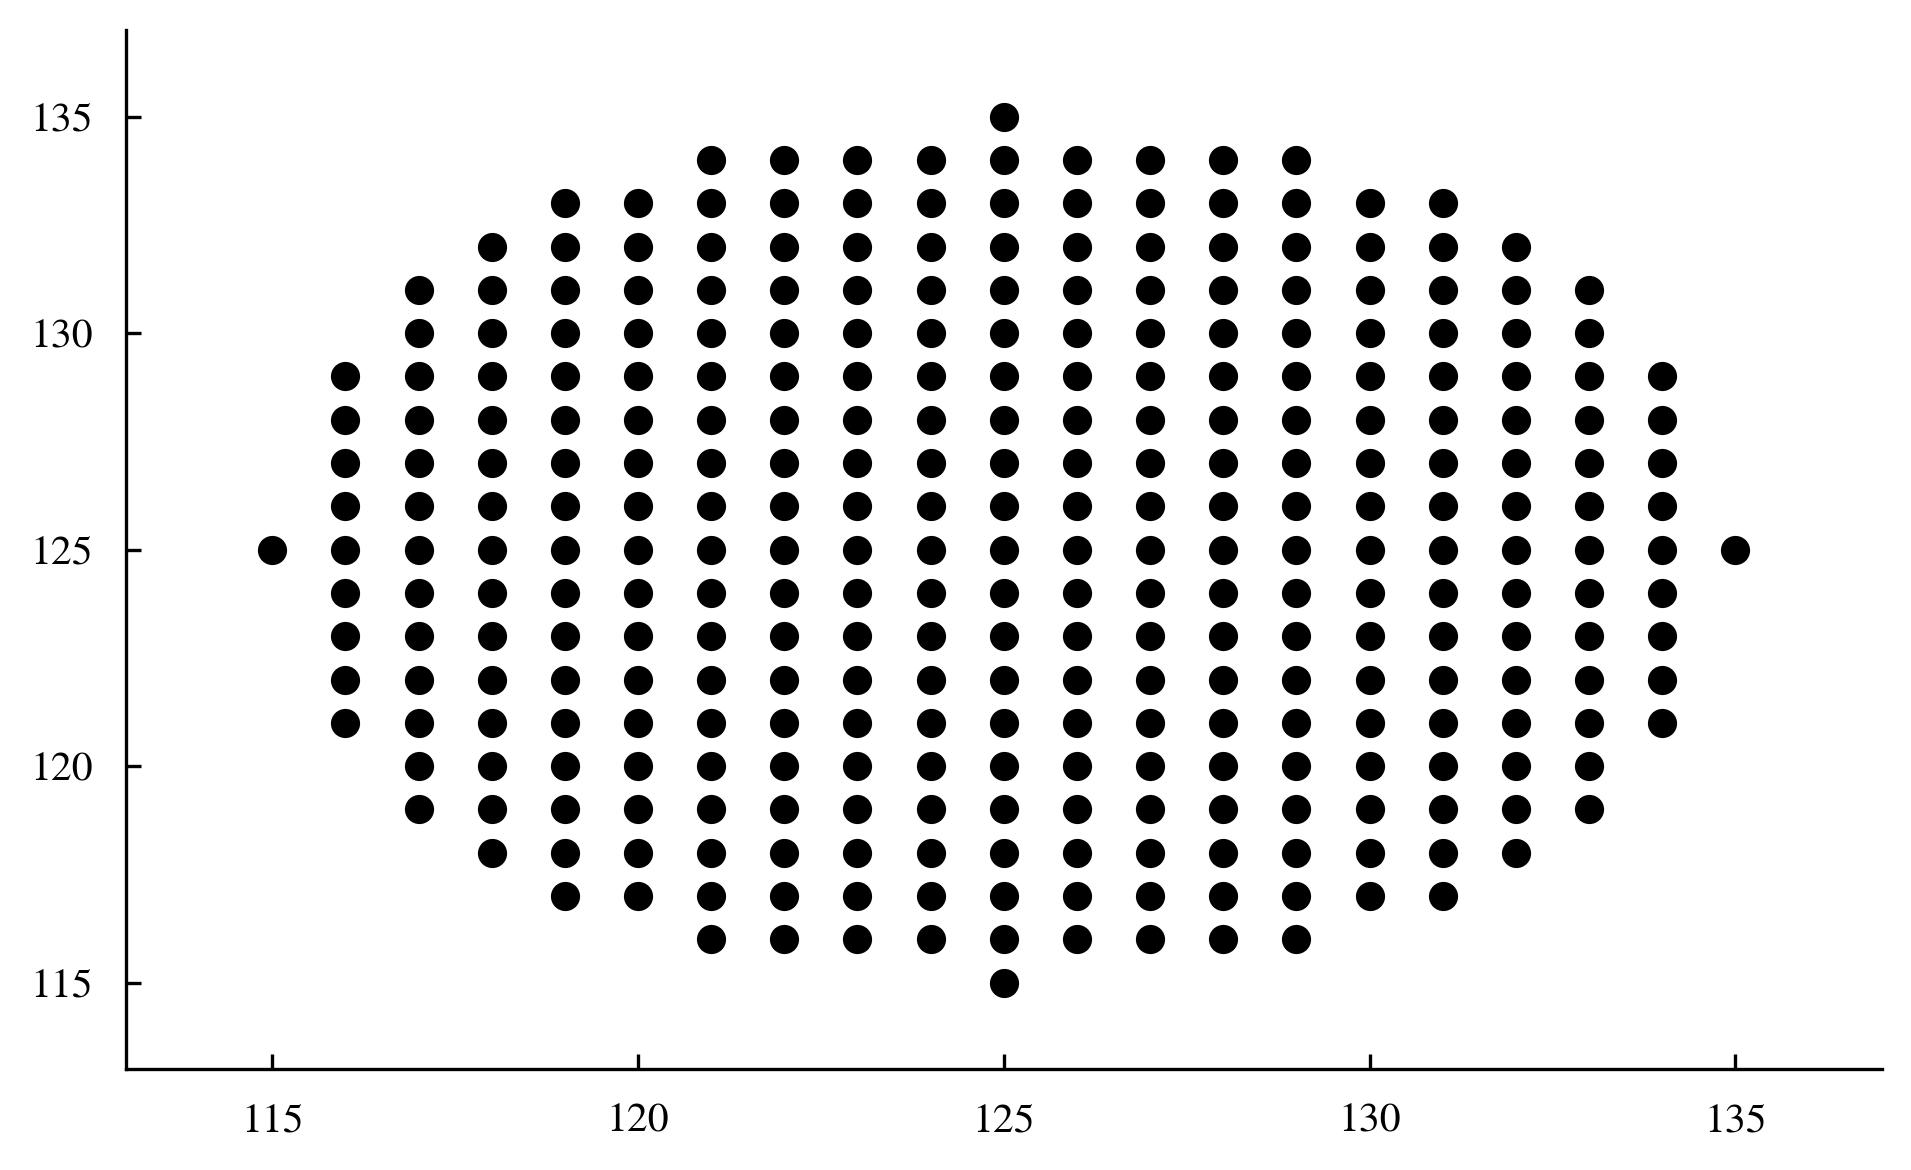

In [51]:
plt.figure()
s = plt.scatter(*indices)
# plt.xlim(0,250)
# plt.ylim(0,250)

In [52]:
teehee = myob.exposure.cumsum(axis_name="energy_true")

In [58]:
teehee.data[-1].shape

(250, 250)